# K-Means Clustering

This project aims to show the application of the K-Means algorithm to identify clusters in a synthetic dataset. I applied K-Means to group randomly generated data using the make_blobs function from scikit-learn.

The main purpose of this project is to showcase proficiency in applying clustering algorithms.
 
**Author:** Fausto Lira  

In [1]:
# packages

# Avoiding warnings using Kmeans
import os
os.environ['OMP_NUM_THREADS'] = '3'

# Working with data
import pandas as pd
import numpy as np

# Creating the data
from sklearn.datasets import make_blobs

# Plotting Chart
import matplotlib.pyplot as plt
import seaborn as sns

# Clustering models (with additional code to avoid warning)
from sklearn.cluster import KMeans

# Silhouette method
from sklearn.metrics import silhouette_score

# Confusion Matrix 
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Metrics
from sklearn.metrics import classification_report

## 1. Generate the Dataset

In [2]:
# creating the data
db = make_blobs(n_samples=600, centers=4, n_features=2, random_state=20)

In [3]:
# setting the features and target
features_db = db[0]
labels_db = db[1]

In [4]:
# seaborn set style
sns.set_style('dark')

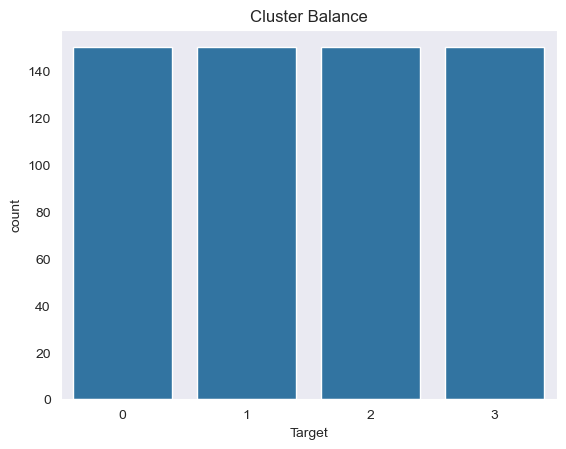

In [5]:
# check the balance of the clusters
sns.countplot(
    pd.DataFrame(labels_db, columns=['Target']), 
    x='Target'
)
plt.title('Cluster Balance')

plt.show()

## 2. Optimal Number of Centroids by Elbow Method

In [6]:
# Elbow method
inertia = []
k = range(1,10)
for i in k:
    km = KMeans(n_clusters=i, n_init = 20, random_state=22)
    km.fit(features_db)
    inertia.append(km.inertia_)

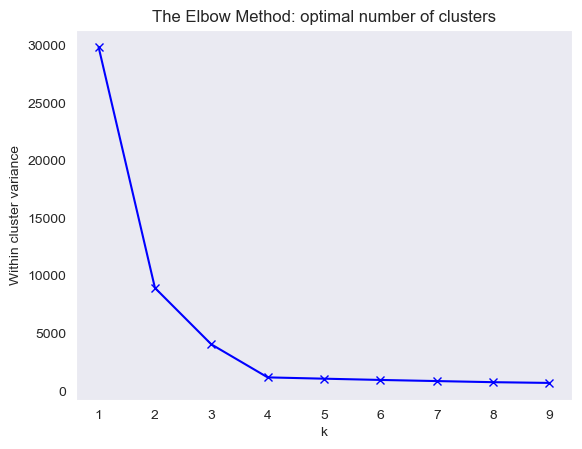

In [7]:
# Plotting Elbow method
plt.plot(k, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Within cluster variance')
plt.title('The Elbow Method: optimal number of clusters')
plt.show()

According to the Elbow chart the most optimal number of centroids is 4.

## 3. Optimal Number of Centroids by Silhouette Method

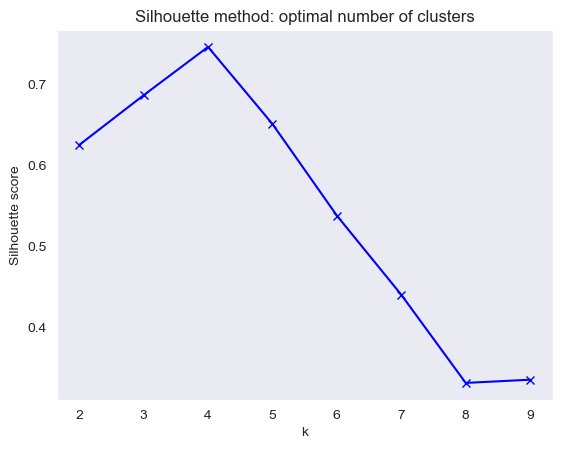

In [8]:
# Plotting silhouette chart
silhouette = []

k = range(2,10)
for i in k:   
    km = KMeans(n_clusters=i, n_init = 20, random_state=22)
    km.fit(features_db)
    labels = km.labels_
    silhouette.append(silhouette_score(features_db, labels))
    
 # Plotting silhouette score
plt.plot(k, silhouette, 'bx-')
plt.xlabel('k') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette method: optimal number of clusters')
plt.show()

According to the Silhouette method, the ideal number of centroids is 4. The same conclusion was observed from the elbow plot.
Both seem very clear pointing to the number 4 as the ideal number of clusters. In this case, both are very accurate.

Since both methods provide the same ideal number, it can be concluded that the number 4 is the best estimate for the ideal number of clusters.

## 4. K-Means Clustering with k=4

In [9]:
# k-means with the optimal number of clusters
km4 = KMeans(n_clusters=4, n_init = 10, random_state=100)
predicted_labels = km4.fit_predict(features_db)

In [10]:
# create a dataset with the features and cluster's labels
features_clustered = \
    pd.DataFrame(
        np.column_stack((features_db, predicted_labels)), 
        columns=['F1', 'F2', 'Clusters']
)

features_clustered['Clusters'] = features_clustered['Clusters'].astype(int)

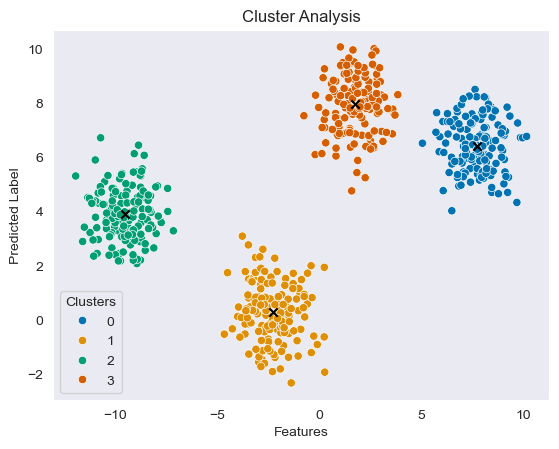

In [11]:
# plot the clusters in a scatter plot chart
sns.scatterplot(
    x = 'F1',
    y = 'F2',
    hue = 'Clusters',
    data = features_clustered,
    palette = 'colorblind'
)

plt.scatter(
    x = km4.cluster_centers_[:, 0],
    y = km4.cluster_centers_[:, 1],
    c = 'black',
    marker = 'x'
)

plt.xlabel('Features')
plt.ylabel('Predicted Label')

plt.title('Cluster Analysis')
plt.show()

In [12]:
# inertia
km4.inertia_

1159.623010797202

### Analyzing the Clusters

- In the graph above you can see that the clusters seem to fit the data very well.
- There is no overlap with the clusters.
- The centers are very well represented in the graph.

## 5. Evaluate the Labels Predicted by the K-Means

In [13]:
labels_db

array([1, 0, 1, 1, 3, 0, 3, 3, 0, 3, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 2, 3,
       3, 0, 1, 3, 2, 2, 1, 0, 2, 1, 2, 3, 1, 2, 1, 1, 2, 3, 1, 1, 0, 3,
       1, 1, 3, 0, 1, 3, 0, 0, 1, 3, 2, 3, 0, 2, 2, 3, 3, 1, 3, 3, 2, 2,
       2, 1, 0, 0, 3, 2, 2, 0, 0, 0, 0, 0, 3, 1, 2, 1, 0, 1, 1, 2, 3, 1,
       1, 0, 1, 0, 2, 3, 3, 2, 2, 3, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 3, 2,
       0, 0, 0, 3, 1, 3, 2, 0, 1, 1, 1, 3, 0, 3, 3, 2, 2, 1, 0, 1, 0, 3,
       1, 0, 0, 1, 2, 1, 3, 3, 0, 2, 0, 0, 1, 0, 0, 2, 3, 1, 0, 3, 1, 0,
       0, 3, 0, 3, 2, 0, 0, 2, 2, 2, 1, 0, 1, 1, 3, 2, 1, 1, 1, 0, 1, 1,
       0, 3, 1, 2, 0, 2, 2, 3, 2, 2, 0, 0, 1, 0, 0, 1, 0, 2, 1, 2, 2, 0,
       3, 3, 3, 2, 3, 0, 1, 1, 2, 3, 1, 0, 2, 1, 2, 2, 1, 2, 0, 0, 2, 2,
       1, 0, 3, 1, 1, 3, 0, 3, 2, 0, 1, 0, 2, 2, 2, 2, 2, 3, 3, 2, 3, 1,
       2, 3, 2, 3, 2, 0, 3, 0, 2, 3, 2, 0, 2, 1, 1, 2, 3, 3, 0, 3, 1, 3,
       3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 0, 0, 0, 0, 3, 2, 1, 2, 2, 3,
       0, 1, 2, 3, 1, 0, 0, 3, 1, 3, 1, 3, 2, 0, 2,

In [14]:
predicted_labels

array([0, 3, 0, 0, 1, 3, 1, 1, 3, 1, 3, 0, 0, 3, 2, 2, 0, 0, 2, 0, 2, 1,
       1, 3, 0, 1, 2, 2, 0, 3, 2, 0, 2, 1, 0, 2, 0, 0, 2, 1, 0, 0, 3, 1,
       0, 0, 1, 3, 0, 1, 3, 3, 0, 1, 2, 1, 3, 2, 2, 1, 1, 0, 1, 1, 2, 2,
       2, 0, 3, 3, 1, 2, 2, 3, 3, 3, 3, 3, 1, 0, 2, 0, 3, 0, 0, 2, 1, 0,
       0, 3, 0, 3, 2, 1, 1, 2, 2, 1, 0, 0, 3, 0, 0, 3, 2, 0, 0, 0, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 0, 0, 0, 1, 3, 1, 1, 2, 2, 0, 3, 0, 3, 1,
       0, 3, 3, 0, 2, 0, 1, 1, 3, 2, 3, 3, 0, 3, 3, 2, 1, 0, 3, 1, 0, 3,
       3, 1, 3, 1, 2, 3, 3, 2, 2, 2, 0, 3, 0, 0, 1, 2, 0, 0, 0, 3, 0, 0,
       3, 1, 0, 2, 3, 2, 2, 1, 2, 2, 3, 3, 0, 3, 3, 0, 3, 2, 0, 2, 2, 3,
       1, 1, 1, 2, 1, 3, 0, 0, 2, 1, 0, 3, 2, 0, 2, 2, 0, 2, 3, 3, 2, 2,
       0, 3, 1, 0, 0, 1, 3, 1, 2, 3, 0, 3, 2, 2, 2, 2, 2, 1, 1, 2, 1, 0,
       2, 1, 2, 1, 2, 3, 1, 3, 2, 1, 2, 3, 2, 0, 0, 2, 1, 1, 3, 1, 0, 1,
       1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 3, 3, 3, 3, 1, 2, 0, 2, 2, 1,
       3, 0, 2, 1, 0, 3, 3, 1, 0, 1, 0, 1, 2, 3, 2,

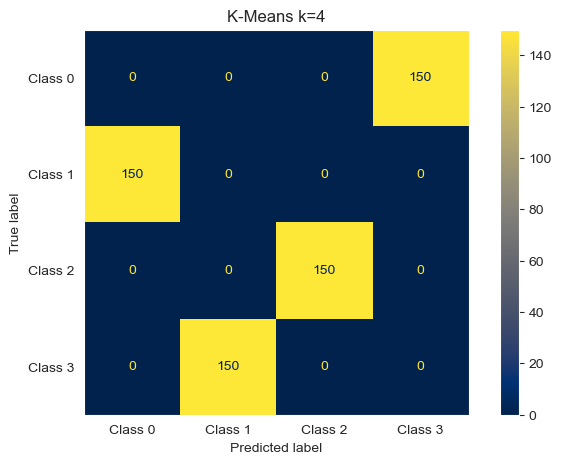

In [15]:
fig, ax = plt.subplots(figsize=(8, 5))
cmd = ConfusionMatrixDisplay(
    confusion_matrix(labels_db, predicted_labels),
    display_labels = [f'Class {i}' for i in range(4)]
)

cmd.plot(ax=ax, cmap='cividis')
plt.title('K-Means k=4')
plt.show()

Note that the classification is perfect. The only problem is the name of the labels. Replacing the name of the labels in the clustering predictions will make the visualization correct.

In [16]:
# replace label names in the predictions set
for i in range(4):
    predicted_labels[predicted_labels==i] = i + 4

predicted_labels[predicted_labels==4] = 1
predicted_labels[predicted_labels==5] = 2
predicted_labels[predicted_labels==6] = 3
predicted_labels[predicted_labels==7] = 0

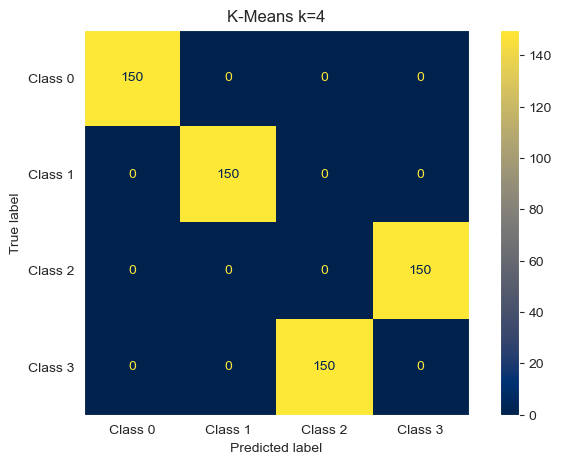

In [17]:
# plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 5))
cmd = ConfusionMatrixDisplay(
    confusion_matrix(labels_db, predicted_labels),
    display_labels = [f'Class {i}' for i in range(4)]
)

cmd.plot(ax=ax, cmap='cividis')
plt.title('K-Means k=4')
plt.show()

In [18]:
print(classification_report(labels_db, predicted_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150
           2       0.00      0.00      0.00       150
           3       0.00      0.00      0.00       150

    accuracy                           0.50       600
   macro avg       0.50      0.50      0.50       600
weighted avg       0.50      0.50      0.50       600



### Conclusion

- From the confusion matrix and classification report, it can be concluded that the accuracy is 100%.
- Furthermore, from the confusion matrix and the rating_report() method, it can be seen thatall  themetrics are equal to 1t as suspected from the scatterplot.
- Sometimes the label names of the make_blobs() function and k-means processes may differ only by the names. It is important to be aware of this.